<h1>Movie Genre Classifciation </h>

<h3>
Create a machine learning model that can predict the genre of a
movie based on its plot summary or other textual information. You
can use techniques like TF-IDF or word embeddings with classifiers
such as Naive Bayes, Logistic Regression, or Support Vector
Machines.
</h3>


<h3> Loading the dataset from Kaggle</h3>

In [ ]:
# Make .kaggle directory
!mkdir ~/.kaggle

# Copy the kaggle.json to this directory
!cp /content/kaggle.json ~/.kaggle/

# Set permission
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hijest/genre-classification-dataset-imdb
!unzip /content/genre-classification-dataset-imdb.zip -d /content/dataset


Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 89% 37.0M/41.7M [00:00<00:00, 72.3MB/s]
100% 41.7M/41.7M [00:00<00:00, 73.6MB/s]
Archive:  /content/genre-classification-dataset-imdb.zip
  inflating: /content/dataset/Genre Classification Dataset/description.txt  
  inflating: /content/dataset/Genre Classification Dataset/test_data.txt  
  inflating: /content/dataset/Genre Classification Dataset/test_data_solution.txt  
  inflating: /content/dataset/Genre Classification Dataset/train_data.txt  


<h3>Importing Libraries</h3>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

<h3>Importing the dataset</h3>

<p>Dataset description</p>
<pre>Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

</pre>

In [ ]:
# Load the dataset
train_file_path = '/content/dataset/Genre Classification Dataset/train_data.txt'
test_file_path = '/content/dataset/Genre Classification Dataset/test_data.txt'
solution_file_path = '/content/dataset/Genre Classification Dataset/test_data_solution.txt'

train_data = pd.read_csv(train_file_path, sep=':::', header=None, engine='python')
test_data = pd.read_csv(test_file_path, sep=':::', header=None, engine='python')
y_test = pd.read_csv(solution_file_path, sep=':::', header=None, engine='python')

# Assign column names
train_data.columns = ['ID', 'Title', 'Genre', 'Description']
test_data.columns = ['ID', 'Title', 'Description']
y_test = y_test.iloc[:, 2]
y_test.columns = ['Genre']

# Check for null values and basic statistics
print(train_data.isnull().sum())
print(train_data.describe())
print(train_data.describe(include=['object']))

ID             0
Title          0
Genre          0
Description    0
dtype: int64
                 ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000
                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


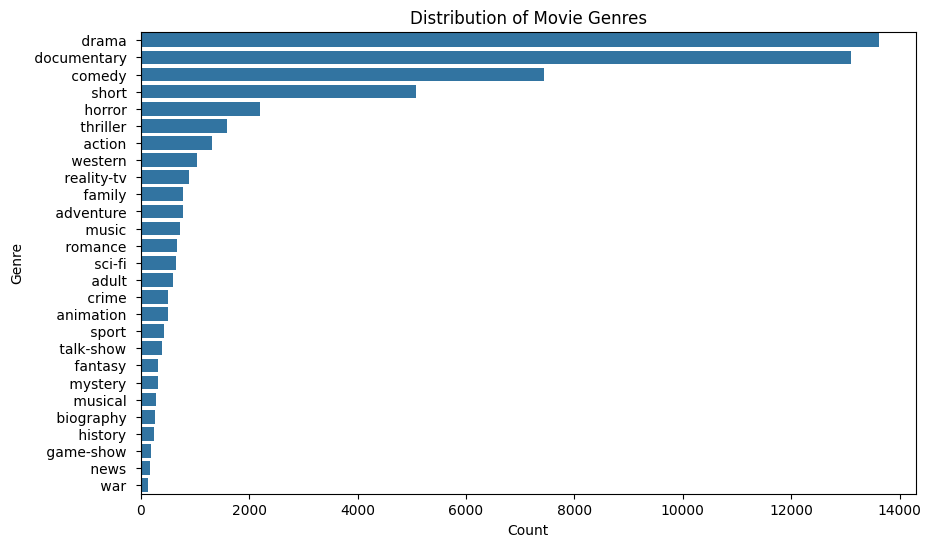

In [ ]:
# Distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Text preprocessing and vectorization
X_train = train_data['Description'].astype(str)
y_train = train_data['Genre']
X_test = test_data['Description'].astype(str)

# TF-IDF Vectorization with additional preprocessing
tfidf = TfidfVectorizer(max_features=20000, stop_words='english', ngram_range=(1, 3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Naive Bayes Model with optimized parameters
nb_model = MultinomialNB(alpha=0.01)
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate Naive Bayes
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')

print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")

Naive Bayes Model Evaluation:
Accuracy: 0.5634
Precision: 0.5525


In [ ]:
# Logistic Regression Model with optimized parameters
lr_model = LogisticRegression(max_iter=2000, C=10, solver='liblinear')
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')

print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")


Logistic Regression Model Evaluation:
Accuracy: 0.5856
Precision: 0.5637


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC

# Reduce dimensionality with TruncatedSVD
svd = TruncatedSVD(n_components=500)  # Reduce to 500 dimensions
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Use LinearSVC instead of SVC for faster computation
svm_model = LinearSVC(C=10, max_iter=10000)  # Increased max_iter to ensure convergence
svm_model.fit(X_train_svd, y_train)

# Predict and evaluate SVM
y_pred_svm = svm_model.predict(X_test_svd)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')

print("\nSupport Vector Machine Model Evaluation (with SVD and LinearSVC):")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")


Support Vector Machine Model Evaluation (with SVD and LinearSVC):
Accuracy: 0.5758
Precision: 0.5518


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Convert TF-IDF matrices to binary (presence/absence of features)
X_train_binary = (X_train_tfidf > 0).astype(int)
X_test_binary = (X_test_tfidf > 0).astype(int)

# Fit BernoulliNB instead of MultinomialNB
bnb_model = BernoulliNB(alpha=0.01)
bnb_model.fit(X_train_binary, y_train)

# Now use the binary BernoulliNB in the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('bnb', bnb_model),
    ('lr', lr_model),
    ('svm', svm_model)
], voting='hard')  # Using 'hard' voting for classification accuracy

voting_clf.fit(X_train_svd, y_train)

# Predict and evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test_svd)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')

print("\nVoting Classifier Model Evaluation (with SVD, BernoulliNB, and optimized models):")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"Precision: {precision_voting:.4f}")



Voting Classifier Model Evaluation (with SVD, BernoulliNB, and optimized models):
Accuracy: 0.5772
Precision: 0.5480


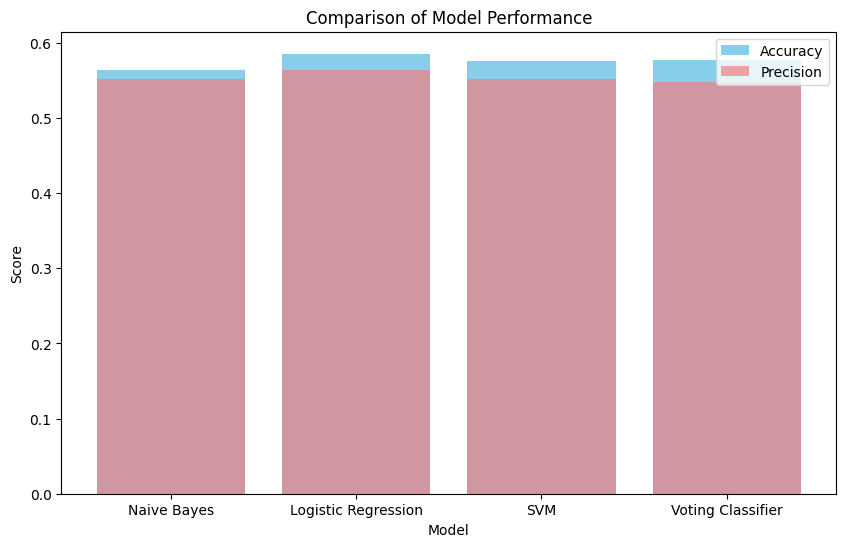

In [ ]:
# Compare the models
models = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Voting Classifier']
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_voting]
precisions = [precision_nb, precision_lr, precision_svm, precision_voting]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue', label='Accuracy')
plt.bar(models, precisions, color='lightcoral', label='Precision', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.show()

<h3>
Logistic Regression is the best model with : <br>
Accuracy: 0.5856 <br>
Precision: 0.5637
</h3>